In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

from rl4uc.environment import make_env

### Analysing changes to wind penetration

In [3]:
env = make_env(num_gen=10)
net = env.profiles_df.demand - env.profiles_df.wind
env.profiles_df.date[np.argmin(net)]


'2019-07-22'

(array([  122.,   642.,  1827.,  3252.,  6503., 10139.,  8165.,  3788.,
         1577.,   273.]),
 array([-212.92687742,  -29.24313059,  154.44061625,  338.12436309,
         521.80810993,  705.49185676,  889.1756036 , 1072.85935044,
        1256.54309728, 1440.22684411, 1623.91059095]),
 <BarContainer object of 10 artists>)

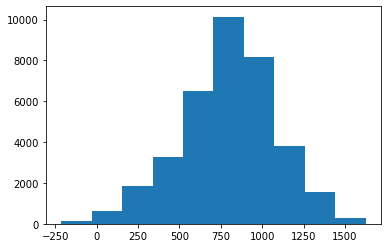

In [4]:
plt.hist(env.profiles_df.demand - env.profiles_df.wind)

Text(0.5, 1.0, 'Highest wind penetration: 2019-07-22')

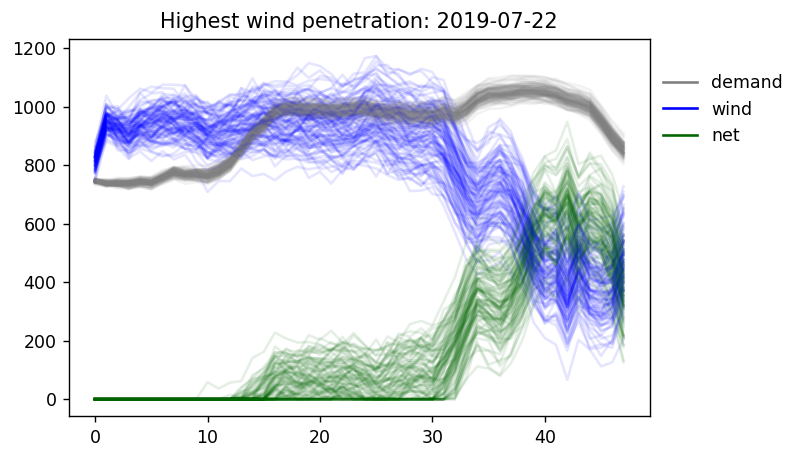

In [5]:
date ='2019-07-22'
env.profiles_df = env.profiles_df[env.profiles_df.date==date]

# env.arma_wind.sigma = 20
fig, ax = plt.subplots(dpi=125)
for i in range(100): 
#     np.random.seed(122)
    env.reset()
    np.random.seed()
    ws = np.zeros(48)
    ds = np.zeros(48)
    ns = np.zeros(48)
    for t in range(48):
        env.step(np.ones(env.num_gen))
        ds[t] = env.demand_real
        ws[t] = env.wind_real
        ns[t] = env.net_demand
    ax.plot(ds, c='gray', alpha=0.1, label='demand') # demand
    ax.plot(ws, c='blue', alpha=0.1, label='wind') # wind
    ax.plot(ns, c='darkgreen', alpha=0.1, label='net') # net demand

leg = plt.legend(['demand', 'wind', 'net'], loc=(1.01, 0.7), frameon=False)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax.set_title(f"Highest wind penetration: {date}")

### Results analysis

In [6]:
import os

d = 'results/22-08-26_convex/22-08-26_convex_g10_q1' # Set the directory containing results here 

def retrieve_results_and_time(d):

    l = []
    t = {}

    for f in os.listdir(d):
        p = os.path.join(d, f)
        if 'results.csv' in f:
            l.append(pd.read_csv(p))
        if 'time.txt' in f:
            t[f.split('_time')[0]] = float(np.genfromtxt(p))
#             t.append()

    df = pd.concat(l)
    return df, t

df, t = retrieve_results_and_time(d)
print("Mean time: {:.2f}".format(np.mean(list(t.values()))))


Mean time: 22.64


## 

In [54]:
for num_gen in [10]:
    
    ds = [f'results/22-09-01_convex/22-09-01_convex_g{num_gen}_q{q}' for q in [1,2,3]]
    
    # ds = [f'results/22-08-31_convex/_convex_g{num_gen}_q1', 
    #       f'results/22-08-31_convex/_convex_g{num_gen}_q2',
    #       f'results/22-08-31_convex/_convex_g{num_gen}_q3']

    results_dict = {}
    



    for i, d in enumerate(ds):
        df, t = retrieve_results_and_time(d)
        results_dict[i] = (df, t)
        
    costs_det = results_dict[0][0].groupby('profile').total_cost.mean() /1e6
    costs_q5 = results_dict[1][0].groupby('profile').total_cost.mean() / 1e6
    costs_q13 = results_dict[2][0].groupby('profile').total_cost.mean() / 1e6
    
    lolp = 100 *results_dict[2][0].lost_load_events.sum() / (48 * results_dict[2][0].shape[0])
    print(lolp)

    costs = pd.DataFrame({'deterministic': costs_det, 
                          'stochastic_5_quantiles': costs_q5,
                          'stochastic_13_quantiles': costs_q13})
    
    times_df = pd.DataFrame({'deterministic': results_dict[0][1],
                             'stochastic_5_quantiles': results_dict[1][1],
                             'stochastic_13_quantiles': results_dict[2][1]})
    times_df = times_df.sort_index()
    
    print(f"{num_gen} generators")
    print(pd.DataFrame(costs[~costs.isna().any(axis=1)].sum()))
    print("**************************")
    print()
    

costs

1.3814791666666666
10 generators
                                0
deterministic            8.699722
stochastic_5_quantiles   8.342645
stochastic_13_quantiles  8.337750
**************************



,deterministic,stochastic_5_quantiles,stochastic_13_quantiles
profile,,,
profile_2016-01-12,0.566980,0.547281,0.546726
profile_2016-07-25,0.331518,0.322469,0.322563
profile_2016-11-21,0.500036,0.474889,0.473165
profile_2017-03-18,0.379361,0.359559,0.359573
profile_2017-04-07,0.475481,0.450252,0.450274
profile_2017-05-12,0.411652,0.399997,0.400234
profile_2017-05-26,0.370050,0.354983,0.354962
profile_2017-06-25,0.388725,0.366838,0.366941
profile_2017-12-18,0.610357,0.584896,0.584401


In [52]:
times_df.describe()

,deterministic,stochastic_5_quantiles,stochastic_13_quantiles
count,20.000000,20.000000,20.000000
mean,9.859000,55.675000,155.926000
std,11.093861,65.581349,233.900037
min,1.780000,5.780000,14.890000
25%,2.082500,10.652500,17.862500
50%,3.835000,27.665000,49.315000
75%,12.990000,77.702500,174.385000
max,35.630000,211.210000,850.440000


In [33]:
correct = lambda row: (row['stochastic_5_quantiles'] <= row['deterministic']) & (row['stochastic_13_quantiles'] <= row['stochastic_5_quantiles'])
costs[~costs.apply(correct, axis=1)]

,deterministic,stochastic_5_quantiles,stochastic_13_quantiles
profile,,,
profile_2016-07-25,0.331518,0.322469,0.322563
profile_2017-03-18,0.379361,0.359559,0.359573
profile_2017-04-07,0.475481,0.450252,0.450274
profile_2017-05-12,0.411652,0.399997,0.400234
profile_2017-06-25,0.388725,0.366838,0.366941


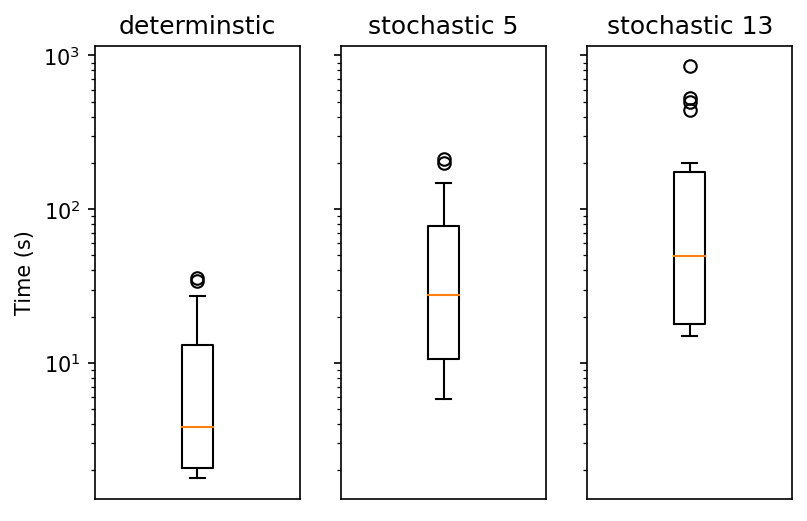

In [34]:
fig, axs = plt.subplots(1, 3, dpi=150, sharex=True, sharey=True)

for q, name in enumerate(['determinstic', 'stochastic 5', 'stochastic 13']):
    ax = axs[q]
    ax.boxplot(list(results_dict[q][1].values()))
    ax.set_xticks([])
    ax.set_title(name)
    ax.set_yscale('log')
    
axs[0].set_ylabel("Time (s)")
plt.show()


In [36]:
import json

def plot_schedule(date, solution_dir, ax=None): 
    
    if ax is None:
        ax = plt.gca()
        
    num_gen = json.load(open(os.path.join(solution_dir, 'env_params.json')))['num_gen']
    
    # Read problem df 
    df = pd.read_csv(f'test_data_windy/profile_{date}.csv')
    df['wind'] = df.wind * (num_gen / 10)
    df['demand'] = df.demand * (num_gen / 10)

    # Create env 
    env = make_env(mode='test', num_gen=num_gen, profiles_df=df)
    
    # Path to solution
    p = os.path.join(solution_dir, f'profile_{date}_solution.csv')
    solution = pd.read_csv(p).values

    np.random.seed(123)
    for i in range(100): 
        env.reset()
        ws = np.zeros(48)
        ds = np.zeros(48)
        ns = np.zeros(48)
        for t, a in enumerate(solution):
            env.step(a)
            ds[t] = env.demand_real
            ws[t] = env.wind_real
            ns[t] = env.net_demand
        ax.plot(ds, c='gray', alpha=0.05, label='demand') # demand
        ax.plot(ws, c='blue', alpha=0.05, label='wind') # wind
        ax.plot(ns, c='darkgreen', alpha=0.1, label='net') # net demand

    ax.bar(np.arange(48), np.dot(solution, env.max_output), width=1, alpha=0.6)
    ax.plot(np.arange(48), np.dot(solution, env.min_output), alpha=0.6, linestyle='--', c='r', label='floor')


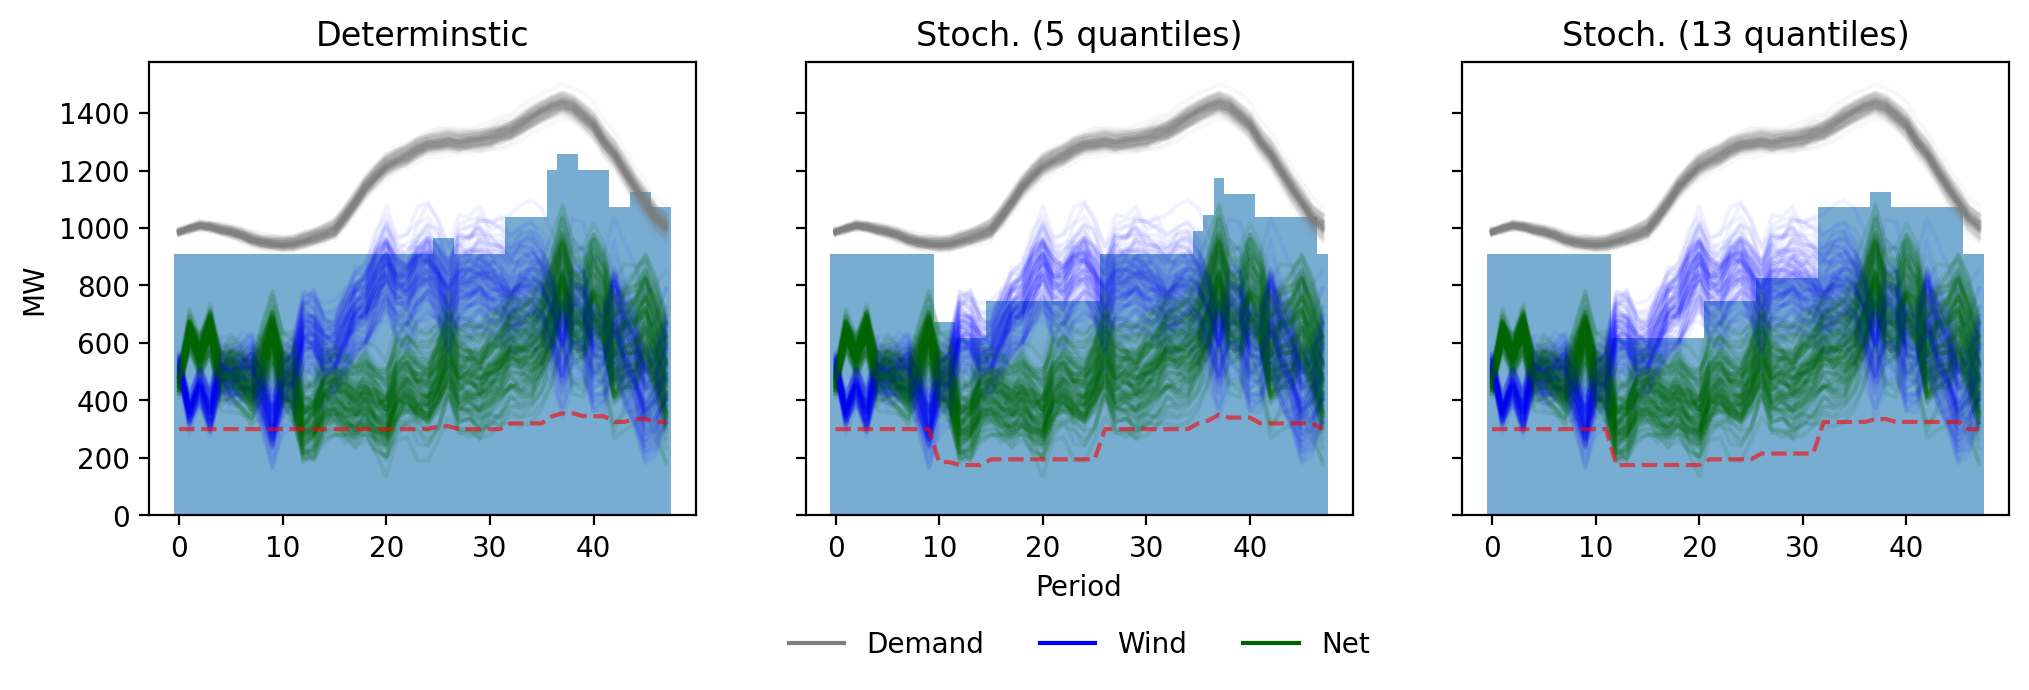

In [56]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1, 3, dpi=200, figsize=(12,3), sharey=True)

for i, name in enumerate(['Determinstic', 'Stoch. (5 quantiles)', 'Stoch. (13 quantiles)']):
    ax = axs[i]
    plot_schedule('2018-03-18', ds[i], ax)
    ax.set_title(name)
axs[0].set_ylabel("MW")
axs[1].set_xlabel("Period")

lines = [Line2D([0], [0], label='Demand', color='gray'), 
         Line2D([0], [0], label='Wind', color='blue'), 
         Line2D([0], [0], label='Net', color='darkgreen')]

# Add legend
axs[1].legend(handles=lines, bbox_to_anchor=(0.5, -0.2), 
              loc='upper center', ncol=3, frameon=False) 
plt.show()


### Code for producing scenarios offline

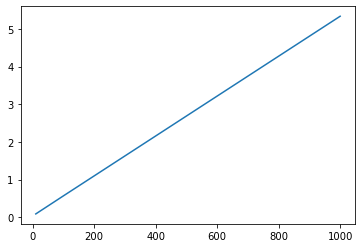

In [49]:
from ts4uc.tree_search.scenarios import sample_errors
import time

horizon = 48

env = make_env(num_gen=10)

ts = []
for num_scenarios in [10, 100, 1000]:
    s = time.time()
    demand_errors, wind_errors = sample_errors(env, num_scenarios, horizon)
    time_taken = time.time() - s
    ts.append(time_taken)
    
fig, ax = plt.subplots()

ax.plot([10, 100, 1000], ts)


In [50]:
rerun = False
if rerun: 
    num_scenarios = 100000
    for num_gen in [10, 20, 30, 40, 50]:
        print(f"Sampling for {num_gen} generators...")

        # Create env 
        env = make_env(num_gen=num_gen)


        s = time.time()
        demand_errors, wind_errors = sample_errors(env, num_scenarios, horizon)
        np.save(f'pglibuc/scenarios_npy/g{num_gen}_wind.npy', wind_errors.astype('float32'))
        np.save(f'pglibuc/scenarios_npy/g{num_gen}_demand.npy', demand_errors.astype('float32'))
        print(f"Time taken: {time.time()-s:.2f} seconds")